In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


# imposta il tema di default di seaborn 
sns.set_theme()


# **ANALISI ESPLORATIVA (EDA)**



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FabioGagliardiIts/ai_ml_python/main/cheat_sheets/boston_housing.csv")

df = df.drop(['Unnamed: 0'], axis = 1) 
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. **CRIM**      per capita crime rate by town
2. **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**     proportion of non-retail business acres per town
4. **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX**       nitric oxides concentration (parts per 10 million)
6. **RM**        average number of rooms per dwelling
7. **AGE**       proportion of owner-occupied units built prior to 1940
8. **DIS**       weighted distances to five Boston employment centres
9. **RAD**       index of accessibility to radial highways
10. **TAX**      full-value property-tax rate per 10,000 
11. **PTRATIO**  pupil-teacher ratio by town
12. **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**    % lower status of the population
14. **MEDV**     Median value of owner-occupied homes in 1000's 

In [ ]:
# CHAS e RAD sono variabili categoriche eliminabili
columns_drop = ["CHAS", "RAD"]
df = df.drop(columns=columns_drop, axis=1)

df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


## 1. **Problema dei valori mancanti (imputazione)**

Regole generali:
- Una colonna che persenta più del 50% di valori mancanti può essere eliminata.
- Se l'assenza di dato intacca la coerenza di una riga nella tabella, si considera l'eliminazione della riga.
- Si sostiuisce il valore mancante con con la media o la mediana.
- In caso di valori ordinati in modo crescente o decrescente, si sostituisce con la media tra i due primi valori utili a precedere e a seguire il dato mancante.

sklearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [ ]:
from sklearn.impute import SimpleImputer


imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')



Iteriamo su tutte le colonne per applicare la media a tutti i valori mancanti


In [ ]:
for column in df:
  if df[column].isnull().values.any():
    tmp = df[column].to_numpy()
    # imputazione dei valori mancanti
    df[column] = imp_mean.fit_transform(tmp)
    

## 2. **Analisi univariata**

- visualizzare tramite istogramma o grafico a dispersione la distribuzione delle singole variabili.
- individuare possibili outlier

### 2.1 **DataViz**

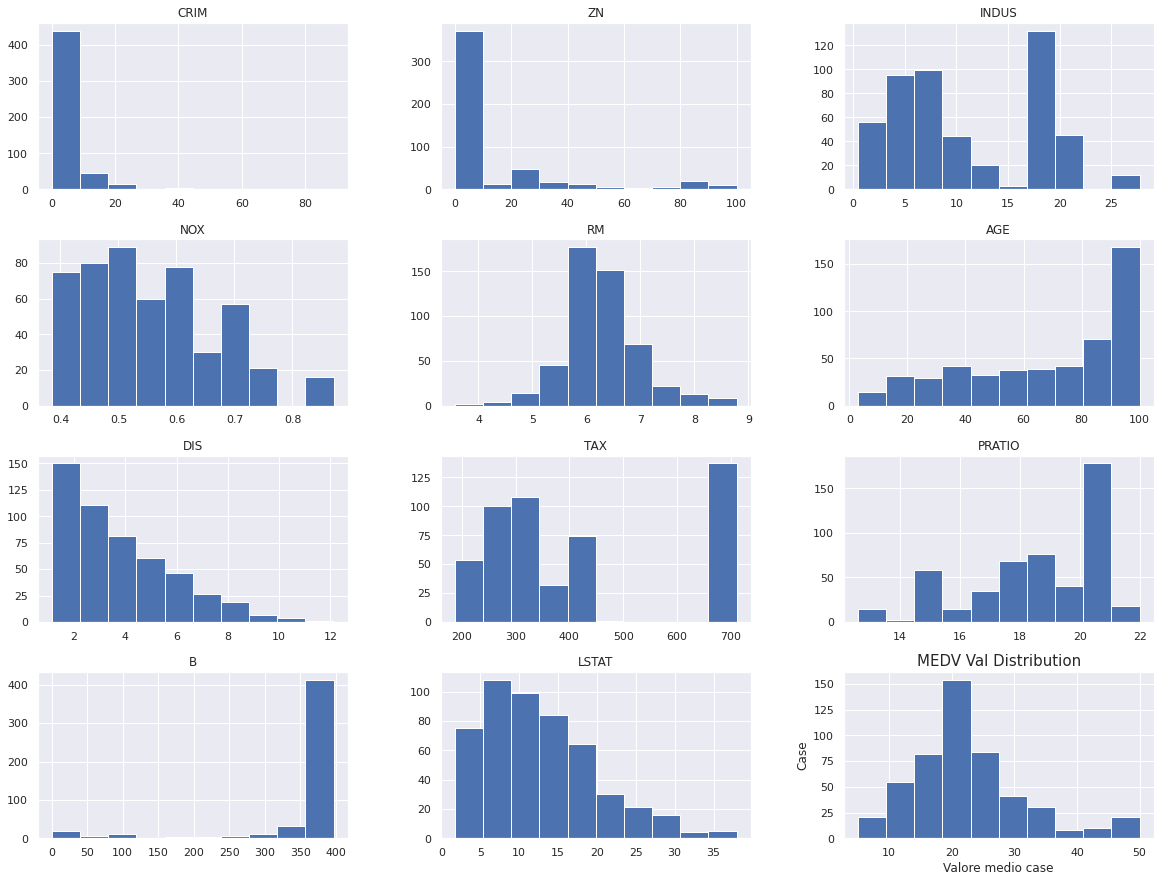

In [ ]:
df.hist(figsize=(20,15))
plt.xlabel("Valore medio case")
plt.ylabel("Case")
plt.title("MEDV Val Distribution", fontsize=15)
plt.show()

### 2.2 **Eliminazione dgli outlier**
- Individuare la forma che assume la distribuzione
- Individuare anomalie tra gli indici statistici:
  - osservare la differenza tra minimo e massimo
  - il valore massimo è fuori scala rispetto alla media?
  - il valore massimo è fuori scala rispetto all deviazione standard?
  - il valore massimo è fuori scala rispetto allo scarto interquaritle?
- visualizzare la distribuzione per individuare anomalie nel grafico   
- Scegliere la tipologia di intervento
  - **distribuzione normale (forma a campana):** si usa la terza deviazione standard per imporre un limite superiore e un limite inferiore. Gli outlier che escono al di fuori di questo range assumono il valore del corrispettivo limite.
  - **distribuzione generica:** si usa lo scarto interquartile per contenere i valori della distribuzione tra il 25-esimo e il 75-esimo percentile.


In [ ]:
def normal_distribution_limits(data: pd.DataFrame):
  mean = data.mean()
  std  = data.std()

  up_limit = mean + std
  low_limit = mean - std

  return mean, up_limit, low_limit



def plot_normal_distribution(data: pd.DataFrame, mean: float, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)),data, alpha=0.5)
    # terza deviazione standard postitiva
    plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up limit') 
    # media
    plt.axhline(mean, color = 'r', linestyle = '-', label='mean')
    # terza deviazione standard negativa
    plt.axhline(low_limit, color = 'brown', linestyle = '-', label='low limit')
    plt.legend()
    plt.show()

In [ ]:
def interquartile_range_limits(data: pd.DataFrame):
  q25 = data.quantile(0.25)
  q75 = data.quantile(0.75)

  iqr  = (q75 - q25)  
  up_limit  = q75 + iqr * 1.5
  low_limit = q25 - iqr * 1.5

  return up_limit, low_limit


def plot_generic_distribution(data: pd.DataFrame,  up_limit: float, low_limit: float) :
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  # up limit
  plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up_limit') 
  # low limit
  plt.axhline(low_limit, color = 'brown', linestyle = '-', label = 'low limit')
  plt.legend()
  plt.show()

In [ ]:
def plot_scatter(data):
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  plt.show()

Indaghiamo la variabile ***CRIM***

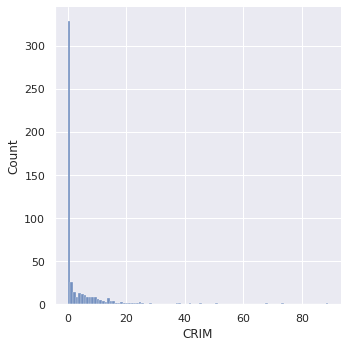

In [ ]:
df_crim = df["CRIM"]

# forma della distribuzione
sns.displot(df_crim)
plt.show()

In [ ]:
# display degli indici statistici
display(df_crim.describe())


count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

L'analisi indica che non si tratta di una distribuzione normale, pertanto si applica lo scarto interquartile come metodo di contenimento delle variabili.

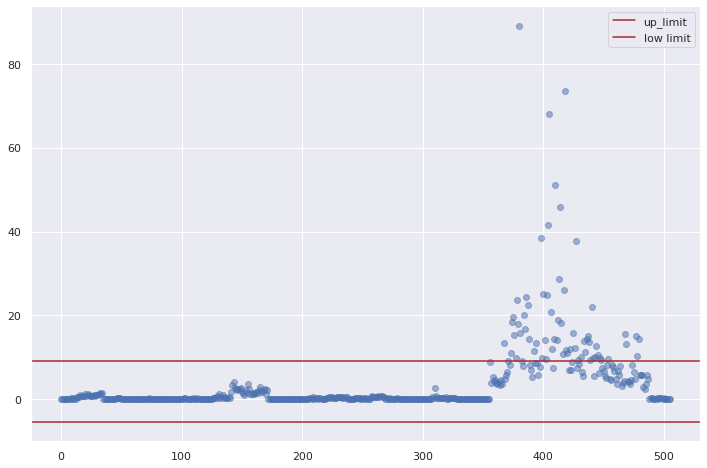

In [ ]:
# limiti dello scarto interquartile
crim_up_limit, crim_low_limit = interquartile_range_limits(df_crim)

# plot
plot_generic_distribution(df_crim, crim_up_limit, crim_low_limit)

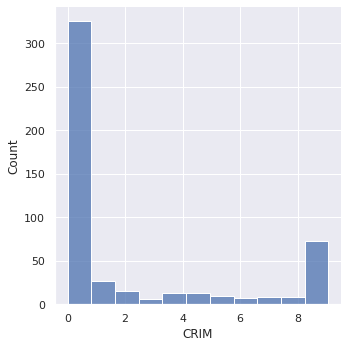

In [ ]:
# # cut
tmp_crim = df_crim.to_numpy()
tmp_crim[tmp_crim > crim_up_limit]  = crim_up_limit
tmp_crim[tmp_crim < crim_low_limit] = crim_low_limit

# plot
sns.displot(df_crim)
plt.show()

Indaghiamo la variabile ***B***

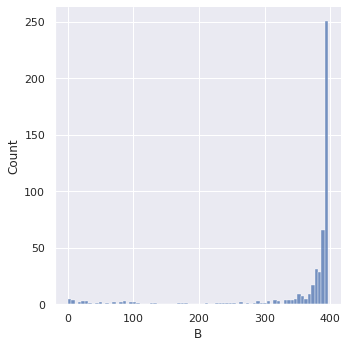

In [ ]:
df_b = df["B"]

# forma della distribuzione
sns.displot(df_b)
plt.show()

Anche in questo caso l'impiego dello scarto interquartile sembra essere la scelta più adatta.

In [ ]:
# display degli indici statistici
display(df_b.describe())


count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

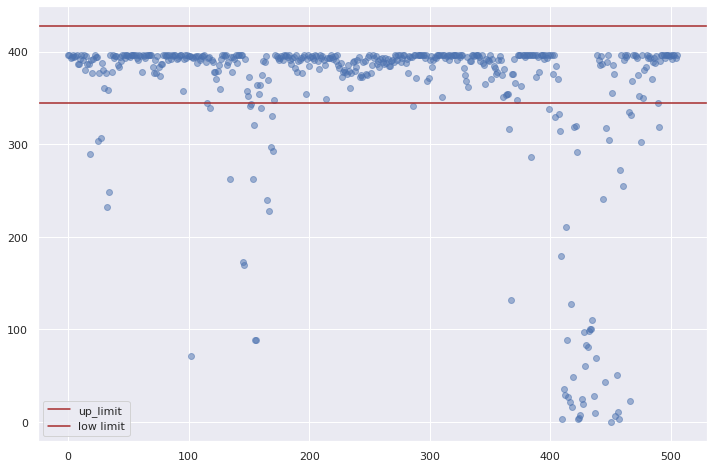

In [ ]:
# limiti dello scarto interquartile
b_up_limit, b_low_limit = interquartile_range_limits(df_b)

# plot
plot_generic_distribution(df_b, b_up_limit, b_low_limit)

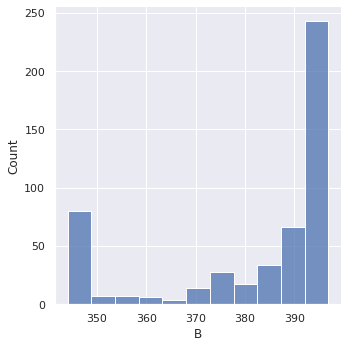

In [ ]:
# # cut
tmp_b = df_b.to_numpy()
tmp_b[tmp_b > b_up_limit]  = b_up_limit
tmp_b[tmp_b < b_low_limit] = b_low_limit

# plot
sns.displot(df_b)
plt.show()

## 3. **Analisi multivariata**

- visualizzare correlazioni
- selezione delle features


### 3.1 **Correlazioni**

- visualizzare la matrice delle correlazioni
- visualizzare la correlazione tra il valore da predirre e le *feature*

#### 3.1.1 Correlation Matrix

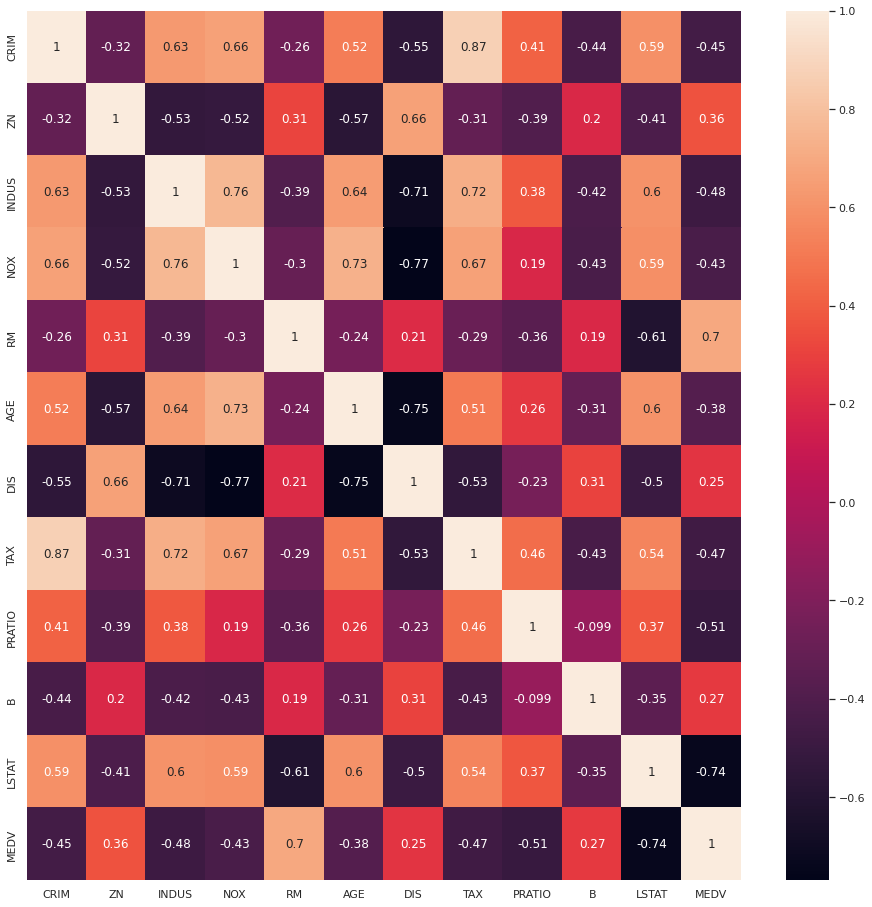

In [ ]:


# Correlation matrix
corr_matrix = df.corr()

# plot
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### 3.1.1 Feature-Label correlation 

In [ ]:
corr_fl = corr_matrix['MEDV'].sort_values(ascending=False)
display(corr_fl)

MEDV      1.000000
RM        0.695360
ZN        0.360445
B         0.271067
DIS       0.249929
AGE      -0.376955
NOX      -0.427321
CRIM     -0.454495
TAX      -0.468536
INDUS    -0.483725
PRATIO   -0.507787
LSTAT    -0.737663
Name: MEDV, dtype: float64

### 3.2 **Selezione delle features**

- Utilizzare la matrice di correlazione per:
  - individuare variabili con una scarsa correlazione sia con la variabile da predirre che con le altre.   
  - individuare variabili ridondanti
es.  \
Un dataset sulle quotazioni immobiliari potrebbe contenere sia il dato della media delle stanze per numero abitativo sia la media di una tipologia di stanza (bagni, camere da letto). Il secondo tipo di dato è del tutto superfluo poichè già contenuto nel primo. 

- Aggregare le variabili che potrebbero essere sostituite da un unico valore in grado di rappresentarle tutte. \
es. \
In un dataset potrebbero esserci variabili riferite ad altezza e peso. Tuttavia sostituire i valori di entrambe con il corrispettivo indice di massa corporea potrebbe aumentare il vaore descrittivo e aumentare la resa del modello di apprendimento.


La variabile **B** sembra una variabile poco utile dal momento che ha una scarsa correlazione con il resto del dataset.

In [ ]:
df = df.drop(columns=['B'], axis=1)
display(df)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,6.48,22.0


# **DATA SPLIT**

Uun set di dati può essere suddiviso al più in tre blocchi:

- **Training set**: il set di dati usato in fase di addestramento.
- **Validation set**: il set utilizzato per valutare il modello mentre si regolano gli iperparametri del modello scelto.
- **Test set**: il set usato per la valutazione finale della fase di training.

In generale per dataset non molto grandi conviene limitarsi ai set di training e test, usando quest'ultimo anche per la validazione. Un ulteriore divisione dei dati potrebbe risultare controproducente. 

In [ ]:

from sklearn.model_selection import train_test_split


## 1. **Features and Labels**

In [ ]:
X = df.drop("MEDV", axis=1).values
Y = df["MEDV"].values

# **TRAINING**


- Ricerca del modello di apprendimento
  - split 
  - training 
  - Validazione
- Regolarizzazione
- Ottimizzazione 
- Test


## 1. **Ricerca del modello di apprendimento**

In [ ]:


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ottimizzazione
from sklearn.model_selection import GridSearchCV



Testare se un modello va in: 
- **overfitting**: il modello si adatta troppo al set di training e non riesce a predirre nuove feature correttamente. In genere si manifesta con stime di errore fuori scala (valori di **mse** molto grande e **r2** fuori dal range [0,1]).
- **underfitting**: il modello di addestramento scelto non è adatto ai valori da predirre (**mse** assume valori molot grandi e **r2** tende a zero)

**Funzioni di validazione**

In [ ]:


# visualizza gli errori accumulati durante
# un processo di validazione iterativo
def plot_errors_curves(mse_errors, r2_errors):
  plt.figure(figsize=(12, 8))
  plt.axhline(np.max(y), color = 'brown', linestyle = '-', label = 'max y')
  plt.plot(np.sqrt(mse_errors), "b", label= 'rmse')
  plt.axhline(np.min(y), color = 'brown', linestyle = '-', label = 'min y')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12, 8))
  plt.plot(r2_errors, "g", label="r2")
  plt.legend()
  plt.show()  



# testa e valida una pipeline generica
def pipeline_validation(pipeline, x, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # trainging
    pipeline.fit(x_train, y_train)

    # predict
    y_pred = pipeline.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    
    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")


# testa e valida una pipeline con regressione polinominale
def pipeline_poly_validation(regressor, x, y, n):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(n - 1)
  r2_errors  = np.zeros(n - 1)


  for i in range(1,n):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = i), regressor)

    # training
    pipe.fit(x_train, y_train)

    # predict 
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors)



  

**Cross Validation Test e Learning Curve**

Ogni volta che si divide un dataset per ricavare il set di training e il set di validazione, si rischia di causare un alterzione dei dati. 
Potrebbe capitare, infatti, di escludere dal set di training dati fondamentali per la risucita dell'apprendimento oppure di creare un set di tes poco coerente con la descrizione dei dati.

Una tecncia molto semplice per testare le performance del modello con i dati splittati secondo la nostra impostazione, viene chiamata **k-fold validation**.

Parendo da un esempio di split che vede l'80% dei dati assegnati al ***training*** e il 20% al ***test***. 
Si parte con l'addetramento prendendo i blocchi di test in coda all'array di dati, si completa il giro ***traingin-test***, dopodichè si scala di volta in volta per k-volte il blocco di test verso la testa dell'array finché non saranno esaurite le combinazioni possibili.

Alla fine avremo un insieme di valori che ci diranno, per ogni iterazione,quale sia la combinazione più performante.


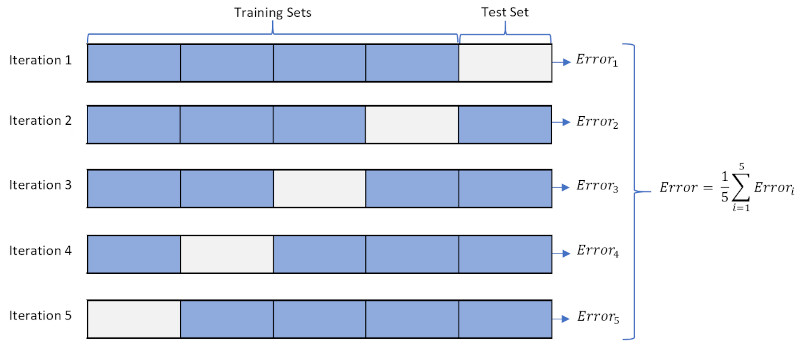

In [ ]:
def plot_learning_curve(pipeline, x, y, cv):

  x_len = len(X)
  train_size_60 = int((x_len * 60) / 100)
  train_size_70 = int((x_len * 70) / 100)
  train_size_80 = int((x_len * 80) / 100)

  train_sizes = [train_size_60, train_size_70, train_size_80]

  train_sizes, train_scores, valid_scores = learning_curve(pipeline, 
                                                           x, 
                                                           y, 
                                                           train_sizes = train_sizes,
                                                           cv=cv)  # iterazioni della cv
  
  train_mean = np.mean(train_scores, axis=1)  
  valid_mean = np.mean(valid_scores, axis=1)


  scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
  display(scores_df)

  plt.figure(figsize=(12, 8))
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='CrossValidation Accuracy')
  plt.legend()
  plt.show()


**Ricerca**

,rmse,r2
0,4.700437,0.775751


,train,validation
0,0.868582,0.031545
1,0.749979,-0.220145
2,0.719571,0.112758


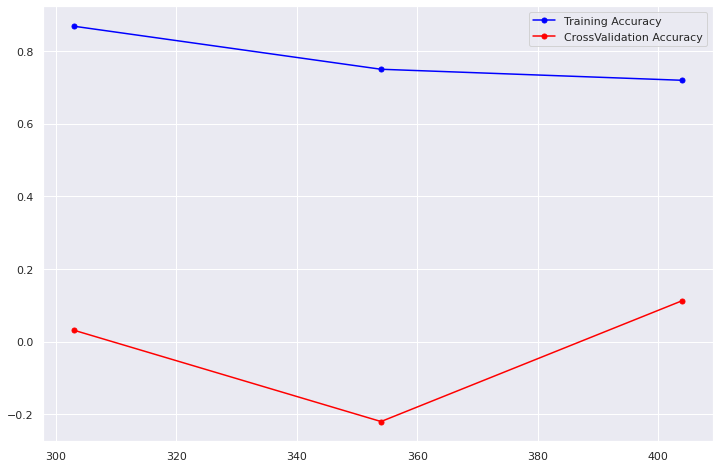

In [ ]:
# test 1
pipeline_validation(make_pipeline(StandardScaler(), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), LinearRegression()), X, Y, 10)

Il modello va in overfitting a causa della non linearità del dataset

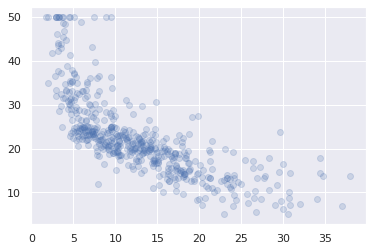

In [ ]:
# la percentuale di abitanti con un basso livello di istruzione
lstat = df[["LSTAT"]].values
# valore medio delle case abitate
y = df["MEDV"].values

plt.scatter(lstat, y, alpha = 0.2)
plt.show()

In questi casi si applica la regressione polinominale.

,rmse,r2
0,9.629328,-0.104076


,train,validation
0,0.995449,-1.263467e+06
1,0.987190,-6.719226e+06
2,0.969942,-7.951948e+02


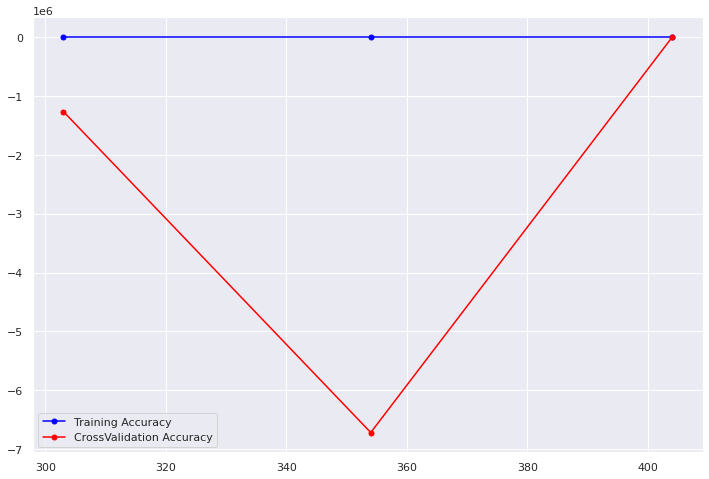

In [ ]:
# test 2
pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y, 10)

Nonostante l'applicazione di una regressione polinominale, durante la fase di training aumenta l'overfitting. 

Usiamo la funzione di validazione per la regressione polinominale e cerchiamo di capire attorno a quale esponente il modello degenera.

Grado: 1  - MSE: 46.1683638257332  - R2: 0.5638764425359903
Grado: 2  - MSE: 22.995376503695002  - R2: 0.7827771102335248
Grado: 3  - MSE: 304.86149995429844  - R2: -1.8798352567949408
Grado: 4  - MSE: 13854.193452633352  - R2: -129.87187055542338
Grado: 5  - MSE: 5003.984868841848  - R2: -46.269504519001096
Grado: 6  - MSE: 7238.741094545353  - R2: -67.3798440341177
Grado: 7  - MSE: 37242.57465725839  - R2: -350.8072290790035


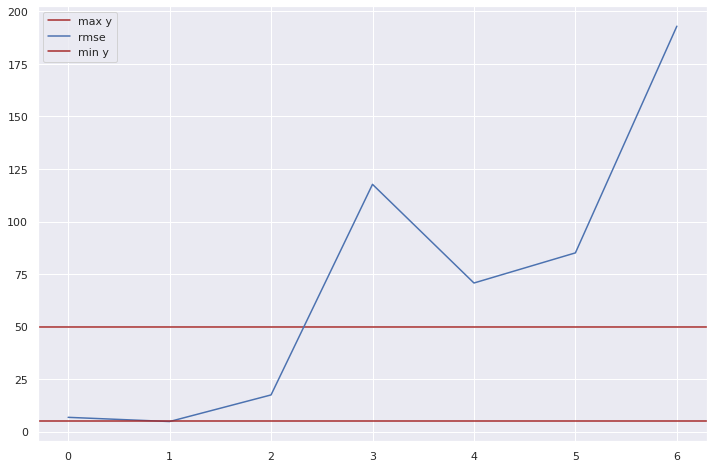

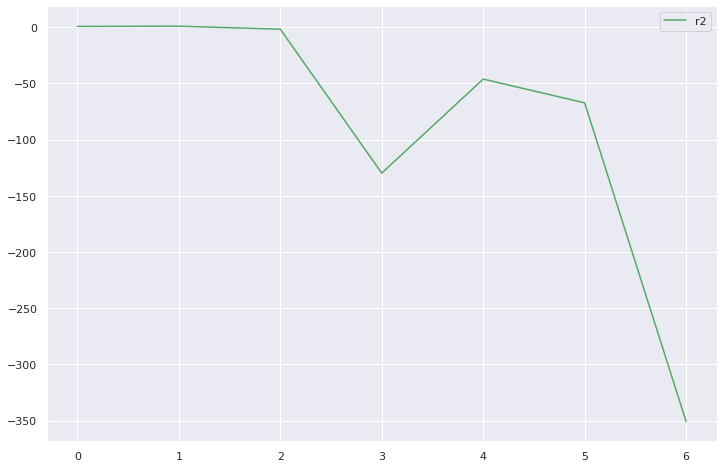

In [ ]:

pipeline_poly_validation(LinearRegression(), X, Y, 8)

Il risultato indica che il modello va in overfitting dopo il secondo grado del polinomio

## 2. **Regolarizzazione**


- **Lasso Regression (Least Absolute Shrinkage Selection Operator)**: per la regolarizzazione L1
- **Ridge Regression**: per la regolarizzazione L2
- **ElasticNet**: implementa  la possibilità di combinare le due tipologie di regolarizzazione.

In [ ]:
from sklearn.linear_model import Ridge


,rmse,r2
0,4.775374,0.755861


,train,validation
0,0.985617,-311.284841
1,0.979435,-450.202684
2,0.963681,-2.622093


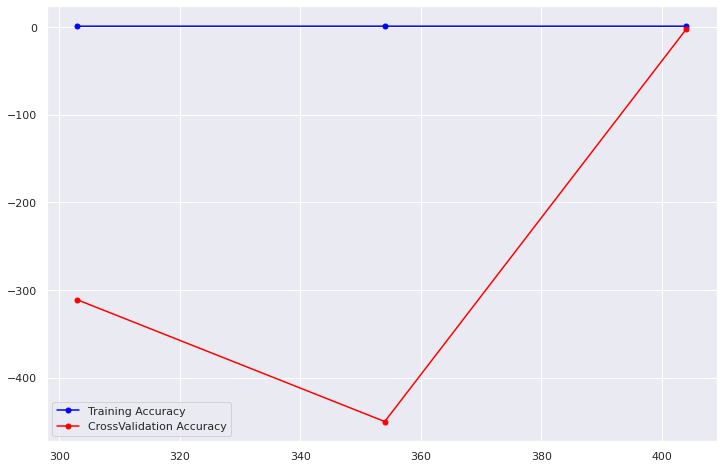

In [ ]:
pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y, 10)

Grado: 1  - MSE: 23.382531601710863  - R2: 0.7108526192054963
Grado: 2  - MSE: 11.69262150238501  - R2: 0.855409545055902
Grado: 3  - MSE: 11.582189100860221  - R2: 0.8567751473867208
Grado: 4  - MSE: 32.35982848928929  - R2: 0.5998397517421619
Grado: 5  - MSE: 28.95849133079334  - R2: 0.6419005408530453
Grado: 6  - MSE: 179.78964053355216  - R2: -1.223270967394234
Grado: 7  - MSE: 489.4965549470136  - R2: -5.053093359681629


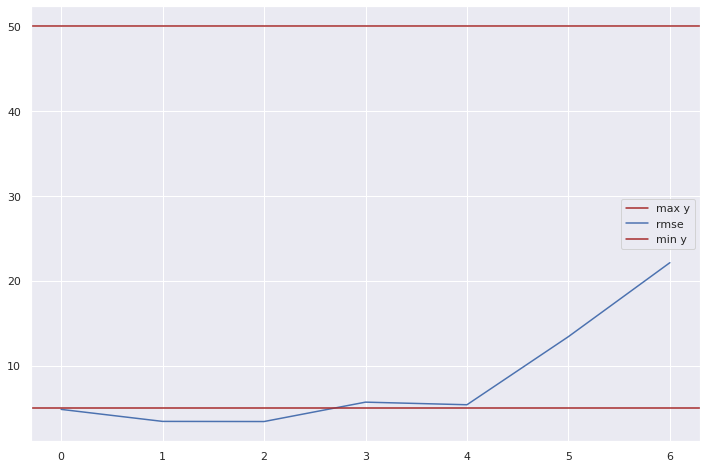

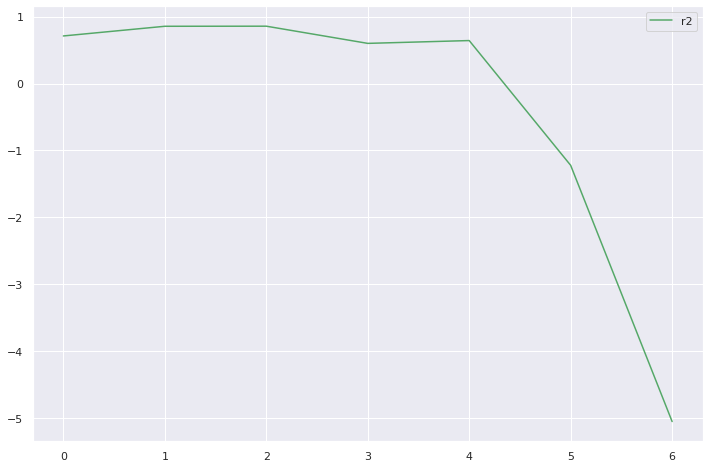

In [ ]:

pipeline_poly_validation(Ridge(), X, Y, 8)

Il risultato migliora ma il modello continua ad andare in overfitting attorno al terzo grado del polinomio

In [ ]:
def test_pipeline_ridge( x, y, polyDegree, maxAlpha):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(maxAlpha - 1)
  r2_errors  = np.zeros(maxAlpha - 1)


  for i in range(1,maxAlpha):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = polyDegree), Ridge(alpha=i))

    # training
    pipe.fit(x_train, y_train)

    # predict 
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors)  

Manteniamo fisso il grado del polinomio e validamo iterativamente l'iperparametro ***alpha*** del modello di regolarizzazione scelto.

Grado: 1  - MSE: 11.43582885528208  - R2: 0.8289851904997152
Grado: 2  - MSE: 11.36784509369092  - R2: 0.8300018400303049
Grado: 3  - MSE: 11.232021497264407  - R2: 0.8320329867676745
Grado: 4  - MSE: 11.084035013792287  - R2: 0.8342460209604616
Grado: 5  - MSE: 10.94131954965962  - R2: 0.8363802307514834


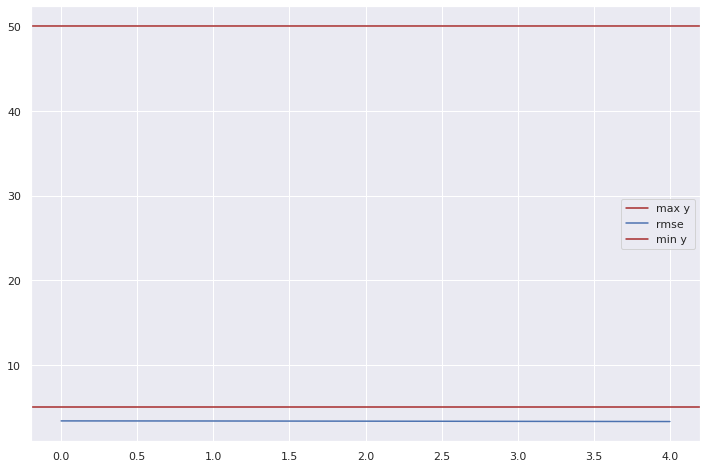

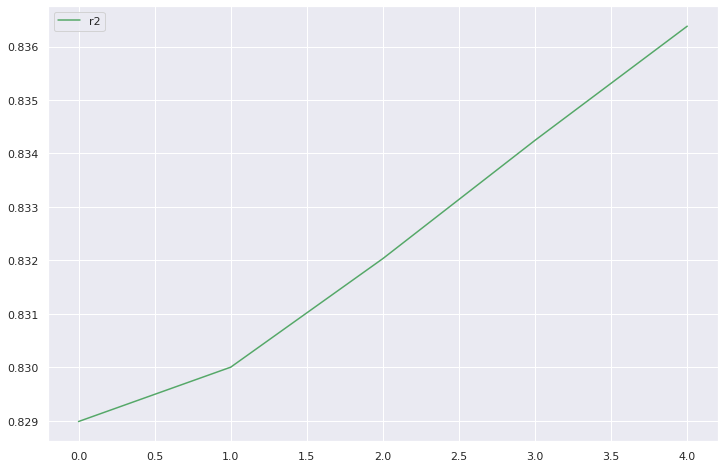

In [ ]:
test_pipeline_ridge(X, Y, 3, 6)

Impostando il grado massimo del polinomio a 3 e iternando sull'iperparametro ***alpha*** del modello di apprendimento otteniamo un netto miglioramento dei valori predetti.

## 2. **Ottimizzazione**
- ricerca degli iperparametri ottimali per ottenere il miglior risultato dalla fase di training.

In [ ]:
def ottimization( x, y):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

  grid_parameter = {
      'polynomialfeatures__degree': [1, 2 , 3, 4],
      'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.],
      'ridge__fit_intercept': [True, False]
      }

  grid_search = GridSearchCV(pipe, grid_parameter)
  grid_search.fit(x_train, y_train)

  print("MIGLIOR SCORE: ", grid_search.best_score_)
  print("I MIGLIORI IPERPARAMETRI: ", grid_search.best_params_)

  return grid_search.best_params_["polynomialfeatures__degree"], \
         grid_search.best_params_["ridge__alpha"], \
         grid_search.best_params_["ridge__fit_intercept"]



In [ ]:
poly_degree, ridge_alpha, ridge_intercept = ottimization(X, Y)

MIGLIOR SCORE:  0.8177366956082661
I MIGLIORI IPERPARAMETRI:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0, 'ridge__fit_intercept': True}


## 3. **Test**

In [ ]:
def test_plot(test, pred):
  # andamento valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(test.size), test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(pred.size), pred, alpha=0.8, label="valori predetti")
  plt.legend()
  plt.show()

  # andamento media mobile valori reali e valori predetti
  r = 20
  maverage_y_test = pd.Series(test).rolling(r).mean() 
  maverage_y_pred = pd.Series(pred).rolling(r).mean() 

  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
  plt.show()

  # varianza tra valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.scatter(test, pred)
  plt.show()

,rmse,r2
0,2.845307,0.887779


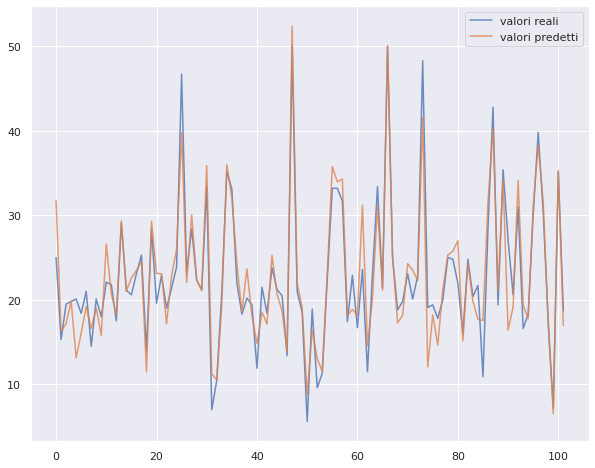

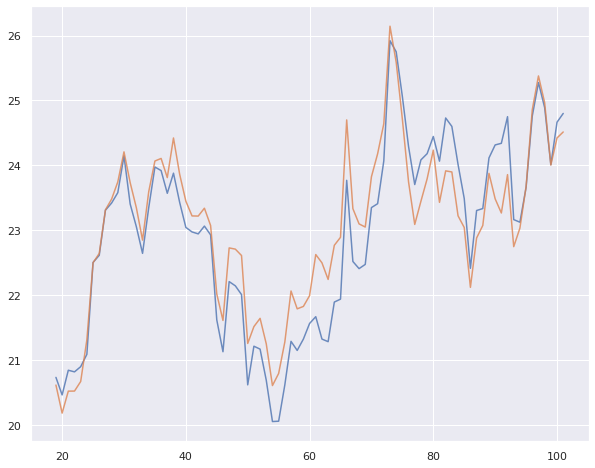

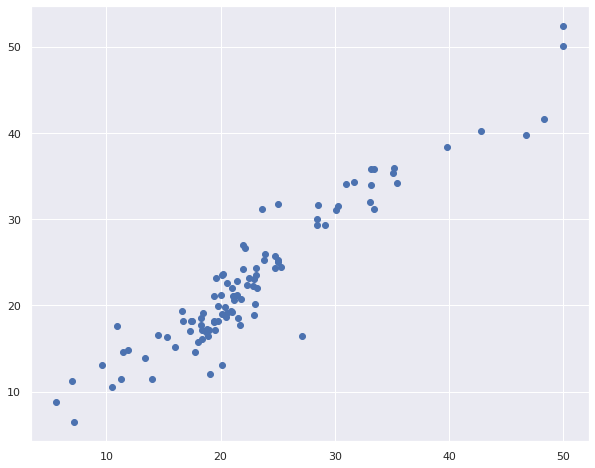

In [ ]:
def test_model(x, y):
  # [1] split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  # [2] pipeline
  pipe = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=poly_degree), 
                      Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept))

  # [3] training
  pipe.fit(x_train, y_train)


  # [3] test
  y_pred = pipe.predict(x_test)


  # [4] error 
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
  display(scores_df)
  print("\n")

  test_plot(y_test, y_pred)

test_model(X, Y)

# **DEPLOY**

- libreria per esportare i file .pmml: https://github.com/jpmml/sklearn2pmml
- libreria per importare i file .pmml: https://github.com/autodeployai/pypmml

In [ ]:
# installazione di  sklearn2pmml
!pip install sklearn2pmml

#installazione pypmml
!pip install pypmml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. **Save**

In [ ]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

def save_model():
  # sklearn2pmml vuole feature e labels come dataframe
  # con i nomi associati alle colonne
  X = df.drop("MEDV", axis=1)
  Y = df["MEDV"]
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


  # [1] train final model
  slc   = StandardScaler()
  poly  = PolynomialFeatures(degree=poly_degree)
  ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept)

  pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),
                              ("poly", poly),
                              ("ridge", ridge)] )
  pmml_pipe.fit(x_train, y_train)


  # ===========
  # [2] OUT
  # ============
  sklearn2pmml(pmml_pipe, "housing.pmml", with_repr = True)



save_model()


## 2. **Load**

In [ ]:
from pypmml import Model


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# ==========
# [1] IN
# ==========
model = Model.fromFile('housing.pmml')

# ===============
# [2] PREDICT
# ===============
y_pred = model.predict(x_test)


#


